# Principal Component Analysis (PCA) on Pokémon Dataset

This notebook demonstrates the application of Principal Component Analysis (PCA) for dimensionality reduction and feature analysis using the Pokémon dataset.

## Import Required Libraries

Import libraries such as pandas, numpy, matplotlib, seaborn, and sklearn for data manipulation, visualization, and PCA.

In [256]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For PCA and preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# For visualization
import plotly.express as px
import plotly.graph_objects as go

# For displaying plots inline
%matplotlib inline

# Set styling for better visualizations
# plt.style.use('')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## Load and Explore Dataset

Load the Pokémon dataset from a CSV file and perform initial exploration, including checking for missing values and understanding the data structure.

In [257]:
# Load the Pokémon dataset
# Note: Adjust the file path if needed
try:
    df = pd.read_csv('data/pokemon.csv')
except FileNotFoundError:
    try:
        # Alternative path if the file is not in the current directory
        df = pd.read_csv('/home/neel/code/python/pr-assignment/pokemon.csv')
    except FileNotFoundError:
        print("Please download the Pokémon dataset and place it in the appropriate directory")
        # You can add code to download the dataset if needed
        # For example:
        # !wget https://raw.githubusercontent.com/path/to/pokemon.csv

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Get basic information about the dataset
print("\nDataset information:")
display(df.info())

# Check for missing values
print("\nMissing values in each column:")
display(df.isna().sum())

# Get statistical summary of numerical features
print("\nStatistical summary of numerical features:")
display(df.describe())

# Get unique values for categorical columns
print("\nUnique Pokémon types:")
if 'type1' in df.columns:
    display(df['type1'].value_counts())
    
print("\nUnique generations:")
if 'generation' in df.columns:
    display(df['generation'].value_counts())
    
print("\nLegendary Pokémon count:")
if 'is_legendary' in df.columns:
    display(df['is_legendary'].value_counts())

First 5 rows of the dataset:


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  agai

None


Missing values in each column:


abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0



Statistical summary of numerical features:


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000



Unique Pokémon types:


type1
water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: count, dtype: int64


Unique generations:


generation
5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: count, dtype: int64


Legendary Pokémon count:


is_legendary
0    731
1     70
Name: count, dtype: int64

### Data Visualization

Let's visualize the distribution of some important features to better understand our dataset.

# Principal Component Analysis on Pokémon Dataset

This notebook implements PCA on the Pokémon dataset to analyze:
1. Core battle stats (attack, defense, hp, etc.)
2. Type effectiveness profiles (weaknesses and resistances)

We'll explore how different Pokémon types and generations cluster together in reduced dimensions.

## 1. Load and Explore Dataset

First, let's import necessary libraries and load the Pokémon dataset.

In [258]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set the style for matplotlib plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [259]:
# Load the Pokémon dataset
# Note: You may need to adjust the file path based on your actual data location
try:
    pokemon_df = pd.read_csv('data/pokemon.csv')
except FileNotFoundError:
    # Alternative location
    pokemon_df = pd.read_csv('../data/pokemon.csv')
    
# Display the first few rows
print("Dataset Preview:")
pokemon_df.head()

Dataset Preview:


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [260]:
# Check the shape of the dataset
print(f"Dataset shape: {pokemon_df.shape}")

# Check for basic statistics
print("\nBasic Statistics:")
pokemon_df.describe()

Dataset shape: (801, 41)

Basic Statistics:


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [261]:
# Check for missing values
print("Missing values in each column:")
pokemon_df.isnull().sum()

Missing values in each column:


abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [262]:
# Explore the dataset structure
print("Column names and data types:")
pokemon_df.info()

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 1

## 2. Preprocess Data

Now we'll preprocess the data:
- Handle missing values
- Log-transform skewed features (e.g., height_m, weight_kg)
- Scale numerical features using StandardScaler

In [263]:
# Create a copy of the original dataframe
pokemon_clean = pokemon_df.copy()

# Handle missing values
# For numerical columns, fill with median
numeric_cols = pokemon_clean.select_dtypes(include=['int64', 'float64']).columns
pokemon_clean[numeric_cols] = pokemon_clean[numeric_cols].fillna(pokemon_clean[numeric_cols].median())

# For categorical columns, fill with mode
categorical_cols = pokemon_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    pokemon_clean[col] = pokemon_clean[col].fillna(pokemon_clean[col].mode()[0])

# Check if all missing values have been addressed
print(f"Missing values after handling: {pokemon_clean.isnull().sum().sum()}")

Missing values after handling: 0


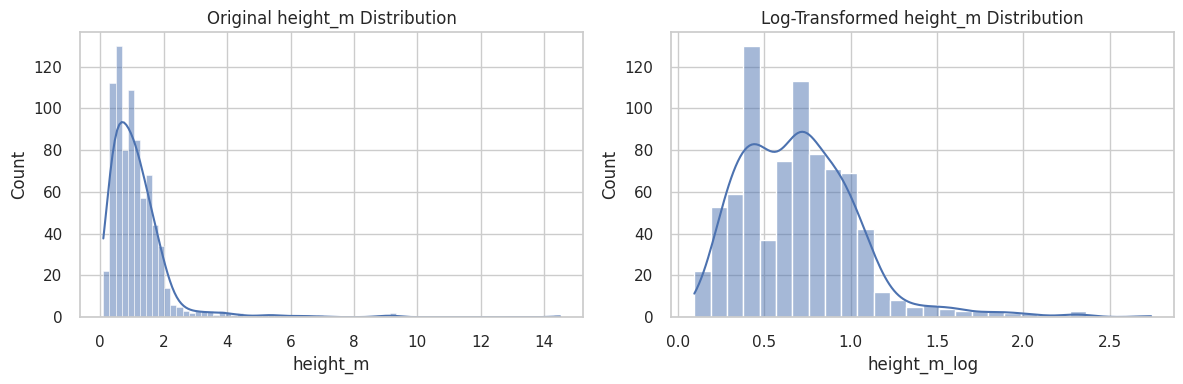

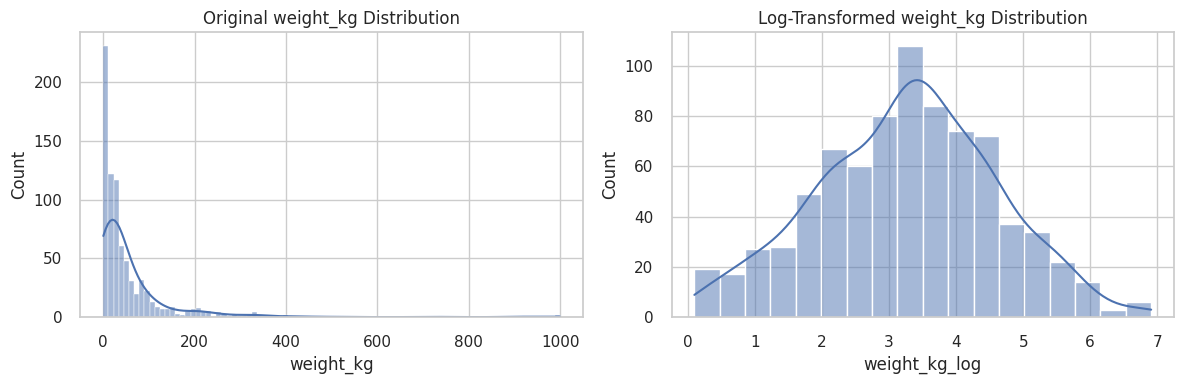

In [264]:
# Log-transform skewed features like height and weight (if they exist)
skewed_features = ['height_m', 'weight_kg']
for feature in skewed_features:
    if feature in pokemon_clean.columns:
        # Add a small constant to avoid log(0)
        pokemon_clean[f'{feature}_log'] = np.log1p(pokemon_clean[feature].replace(0, 0.01))
        
        # Plot original vs log-transformed distribution
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(pokemon_clean[feature], ax=ax[0], kde=True)
        ax[0].set_title(f'Original {feature} Distribution')
        
        sns.histplot(pokemon_clean[f'{feature}_log'], ax=ax[1], kde=True)
        ax[1].set_title(f'Log-Transformed {feature} Distribution')
        plt.tight_layout()
        plt.show()

## 3. PCA on Core Battle Stats

In this section, we'll apply PCA to the core battle stats:
- HP
- Attack
- Defense
- Special Attack
- Special Defense
- Speed
- Base Total (if available)

We'll determine the number of components needed to explain 95% of the variance and interpret the principal components.

In [265]:
# Define core battle stats columns
battle_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Add base_total if it exists, otherwise calculate it
if 'base_total' in pokemon_clean.columns:
    battle_stats.append('base_total')
elif all(stat in pokemon_clean.columns for stat in battle_stats):
    pokemon_clean['base_total'] = pokemon_clean[battle_stats].sum(axis=1)
    battle_stats.append('base_total')

# Check if we have all the required columns
missing_cols = [col for col in battle_stats if col not in pokemon_clean.columns]
if missing_cols:
    print(f"Warning: Missing columns {missing_cols}. Proceeding with available columns.")
    battle_stats = [col for col in battle_stats if col in pokemon_clean.columns]

# Extract battle stats data
battle_data = pokemon_clean[battle_stats].copy()

# Scale the data
scaler = StandardScaler()
battle_data_scaled = scaler.fit_transform(battle_data)

print("Core battle stats to analyze:", battle_stats)

Core battle stats to analyze: ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']


Number of components needed for 90% variance: 4
Number of components needed for 95% variance: 5


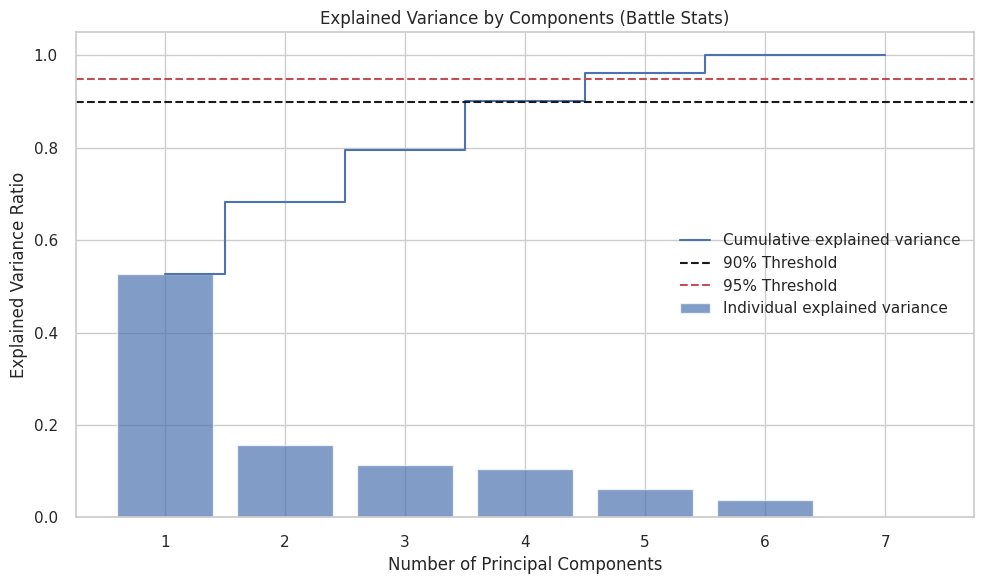

In [266]:
# Apply PCA to battle stats
pca_battle = PCA()
battle_pca = pca_battle.fit_transform(battle_data_scaled)

# Calculate explained variance
explained_variance = pca_battle.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find number of components for 90% and 95% variance
components_90 = np.argmax(cumulative_variance >= 0.9) + 1
components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed for 90% variance: {components_90}")
print(f"Number of components needed for 95% variance: {components_95}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.9, linestyle='--', color='k', label='90% Threshold')
plt.axhline(y=0.95, linestyle='--', color='r', label='95% Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Components (Battle Stats)')
plt.legend()
plt.tight_layout()
plt.show()

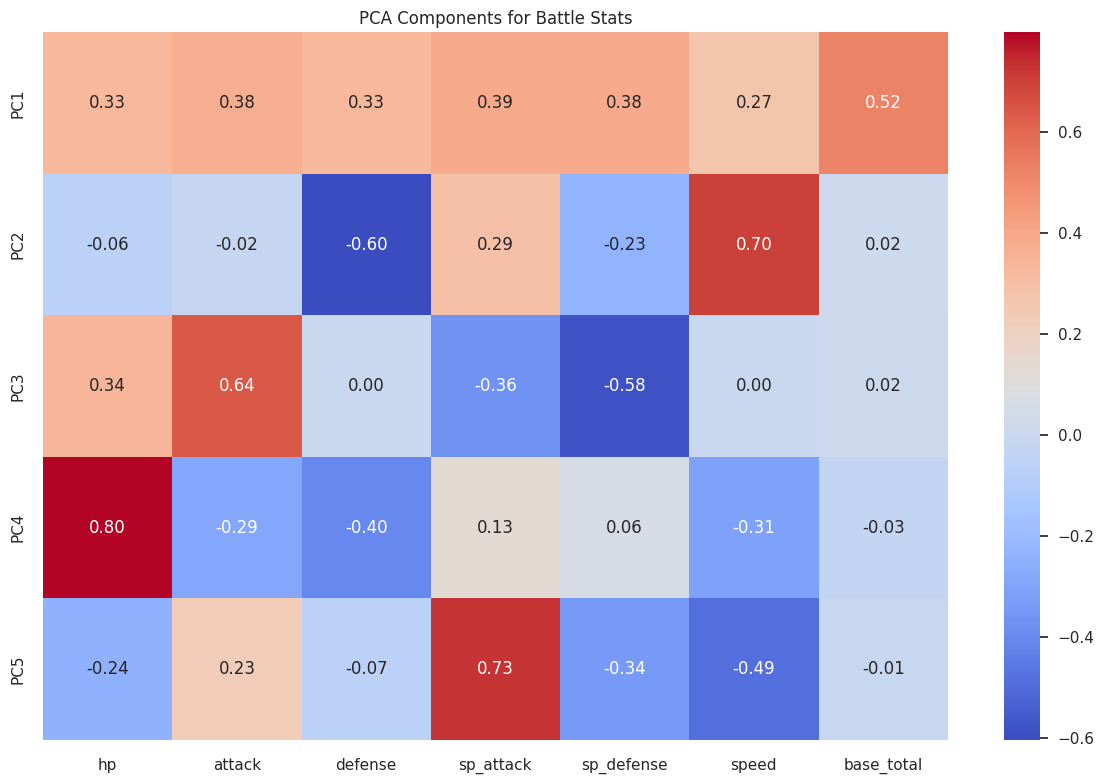

Top 3 Principal Components Interpretation:

PC1 most influential features:
  - base_total: 0.521
  - sp_attack: 0.388
  - sp_defense: 0.383

PC2 most influential features:
  - speed: 0.701
  - defense: -0.603
  - sp_attack: 0.293

PC3 most influential features:
  - attack: 0.643
  - sp_defense: -0.582
  - sp_attack: -0.362


In [267]:
# Analyze PCA components for battle stats
component_df = pd.DataFrame(
    pca_battle.components_,
    columns=battle_stats,
    index=[f'PC{i+1}' for i in range(len(battle_stats))]
)

plt.figure(figsize=(12, 8))
sns.heatmap(component_df.iloc[:5], cmap='coolwarm', annot=True, fmt='.2f')
plt.title('PCA Components for Battle Stats')
plt.tight_layout()
plt.show()

# Detailed analysis of the first 3 principal components
print("Top 3 Principal Components Interpretation:")
for i in range(3):
    pc = component_df.iloc[i].abs().sort_values(ascending=False)
    print(f"\nPC{i+1} most influential features:")
    for feat, val in pc.head(3).items():
        print(f"  - {feat}: {component_df.iloc[i][feat]:.3f}")

## 4. PCA on Type Effectiveness Profile

Now, let's apply PCA to the type effectiveness columns (`against_*`). These columns represent how vulnerable a Pokémon is to different attack types.

In [268]:
# Get type effectiveness columns (columns that start with 'against_')
type_cols = [col for col in pokemon_clean.columns if col.startswith('against_')]

# Check if we have type effectiveness columns
if not type_cols:
    print("No 'against_*' columns found in the dataset. This part of the analysis will be skipped.")
else:
    print(f"Found {len(type_cols)} type effectiveness columns:")
    print(", ".join(type_cols))
    
    # Extract type effectiveness data
    type_data = pokemon_clean[type_cols].copy()
    
    # Scale the data
    type_data_scaled = StandardScaler().fit_transform(type_data)

Found 18 type effectiveness columns:
against_bug, against_dark, against_dragon, against_electric, against_fairy, against_fight, against_fire, against_flying, against_ghost, against_grass, against_ground, against_ice, against_normal, against_poison, against_psychic, against_rock, against_steel, against_water


Number of components needed for 90% variance: 10
Number of components needed for 95% variance: 12


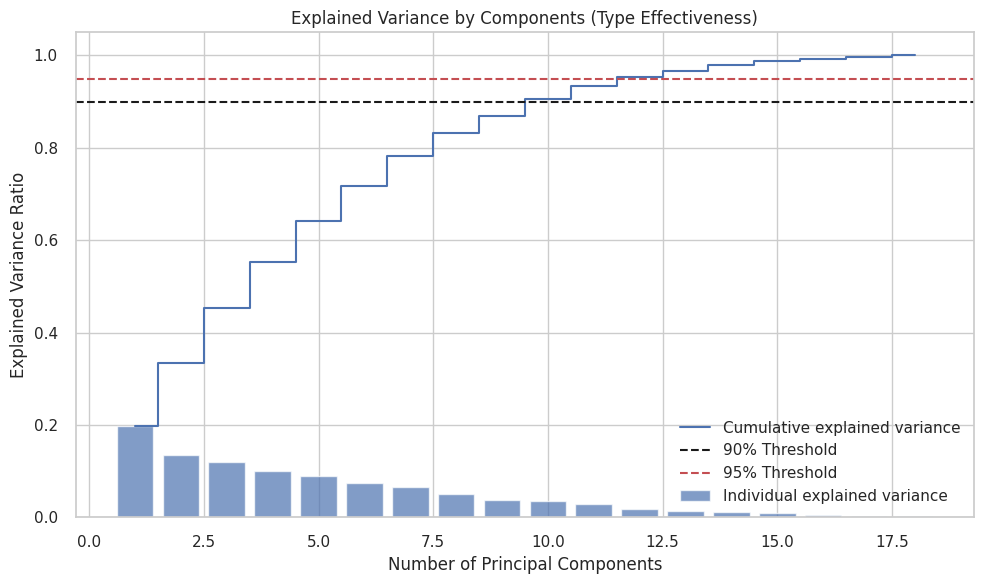

In [269]:
# If we have type effectiveness columns, apply PCA
if len(type_cols) > 0:
    # Apply PCA to type effectiveness data
    pca_type = PCA()
    type_pca = pca_type.fit_transform(type_data_scaled)
    
    # Calculate explained variance
    explained_variance_type = pca_type.explained_variance_ratio_
    cumulative_variance_type = np.cumsum(explained_variance_type)
    
    # Find number of components for 90% and 95% variance
    components_90_type = np.argmax(cumulative_variance_type >= 0.9) + 1
    components_95_type = np.argmax(cumulative_variance_type >= 0.95) + 1
    
    print(f"Number of components needed for 90% variance: {components_90_type}")
    print(f"Number of components needed for 95% variance: {components_95_type}")
    
    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_type) + 1), explained_variance_type, alpha=0.7, label='Individual explained variance')
    plt.step(range(1, len(cumulative_variance_type) + 1), cumulative_variance_type, where='mid', label='Cumulative explained variance')
    plt.axhline(y=0.9, linestyle='--', color='k', label='90% Threshold')
    plt.axhline(y=0.95, linestyle='--', color='r', label='95% Threshold')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Components (Type Effectiveness)')
    plt.legend()
    plt.tight_layout()
    plt.show()

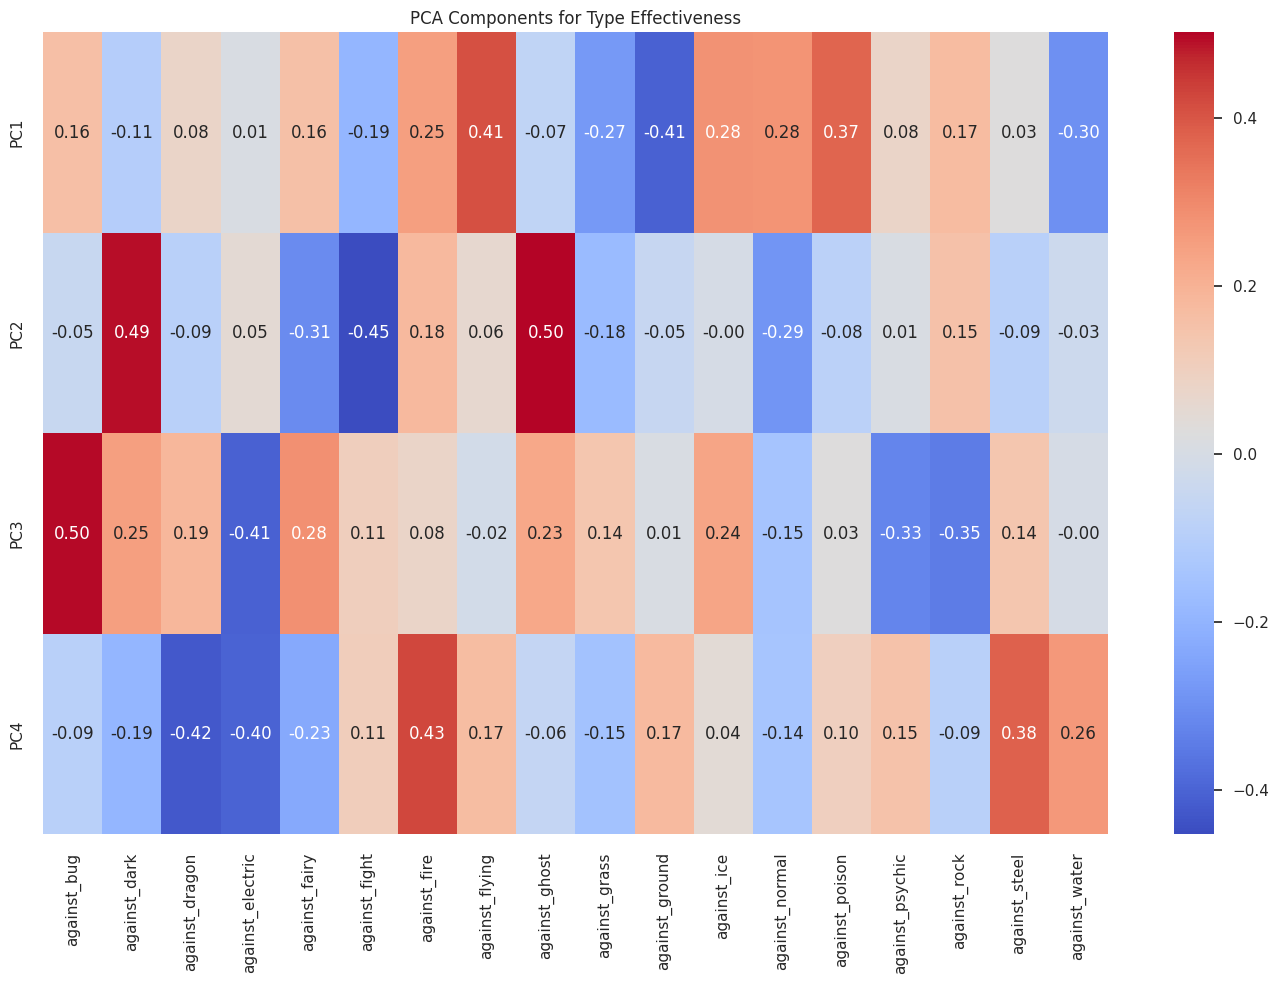

Top 3 Principal Components Interpretation:

PC1 most influential features:
  - against_flying: 0.410
  - against_ground: -0.406
  - against_poison: 0.374

PC2 most influential features:
  - against_ghost: 0.502
  - against_dark: 0.491
  - against_fight: -0.453

PC3 most influential features:
  - against_bug: 0.497
  - against_electric: -0.407
  - against_rock: -0.345


In [270]:
# Analyze PCA components for type effectiveness
if len(type_cols) > 0:
    type_component_df = pd.DataFrame(
        pca_type.components_,
        columns=type_cols,
        index=[f'PC{i+1}' for i in range(len(type_cols))]
    )
    
    # Display the first 4 principal components
    plt.figure(figsize=(14, 10))
    sns.heatmap(type_component_df.iloc[:4], cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('PCA Components for Type Effectiveness')
    plt.tight_layout()
    plt.show()
    
    # Detailed analysis of the first 3 principal components
    print("Top 3 Principal Components Interpretation:")
    for i in range(3):
        pc = type_component_df.iloc[i].abs().sort_values(ascending=False)
        print(f"\nPC{i+1} most influential features:")
        for feat, val in pc.head(3).items():
            print(f"  - {feat}: {type_component_df.iloc[i][feat]:.3f}")

## 5. Visualize PCA Results

Let's create scatter plots to visualize the PCA results. We'll color-code the points by type, legendary status, and generation to identify patterns.

In [271]:
# Add principal components to the original dataframe
pokemon_clean['battle_pc1'] = battle_pca[:, 0]
pokemon_clean['battle_pc2'] = battle_pca[:, 1]

if len(type_cols) > 0:
    pokemon_clean['type_pc1'] = type_pca[:, 0]
    pokemon_clean['type_pc2'] = type_pca[:, 1]

In [272]:
# Create interactive scatter plot for Battle Stats PCA colored by type1
if 'type1' in pokemon_clean.columns:
    fig = px.scatter(
        pokemon_clean, 
        x='battle_pc1', 
        y='battle_pc2',
        color='type1',
        hover_name='name' if 'name' in pokemon_clean.columns else None,
        title='PCA of Battle Stats by Primary Type',
        labels={'battle_pc1': 'PC1', 'battle_pc2': 'PC2'},
        template='plotly_white'
    )
    fig.update_layout(legend_title_text='Type')
    fig.show()

In [273]:
# Create interactive scatter plot for Battle Stats PCA colored by legendary status
if 'is_legendary' in pokemon_clean.columns:
    fig = px.scatter(
        pokemon_clean, 
        x='battle_pc1', 
        y='battle_pc2',
        color='is_legendary',
        hover_name='name' if 'name' in pokemon_clean.columns else None,
        title='PCA of Battle Stats by Legendary Status',
        labels={'battle_pc1': 'PC1', 'battle_pc2': 'PC2'},
        template='plotly_white'
    )
    fig.update_layout(legend_title_text='Legendary')
    fig.show()

## Conclusion

In this notebook, we've applied PCA to two different aspects of Pokémon data:

1. **Battle Stats Analysis**:
   - Identified the principal components that explain the variance in battle statistics
   - Visualized how different types and generations of Pokémon cluster in this space
   - Observed patterns related to legendary status

2. **Type Effectiveness Analysis**:
   - Analyzed the patterns of resistances and weaknesses
   - Identified the key combinations of type effectiveness that explain most variance
   - Visualized how Pokémon cluster based on their defensive profiles

This analysis helps us understand the underlying structure of the Pokémon dataset and how different attributes relate to each other in lower-dimensional space.

## 6. Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis is a supervised dimensionality reduction technique that aims to find feature subspaces that optimize class separability. Unlike PCA, which maximizes variance, LDA maximizes the separation between different classes.

We'll apply LDA to classify Pokémon based on legendary status (legendary vs non-legendary).

In [274]:
# Import LDA from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score

# For better color palettes
import plotly.colors as colors

# For advanced visualizations
from sklearn.inspection import DecisionBoundaryDisplay
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

### 6.1 LDA for Legendary vs Non-Legendary Classification

Let's use LDA to distinguish legendary from non-legendary Pokémon. Since this is a binary classification, we can have at most 1 linear discriminant.

In [275]:
# Prepare data for legendary classification
if 'is_legendary' in pokemon_clean.columns:
    # Remove any rows with missing is_legendary
    pokemon_legendary_clean = pokemon_clean.dropna(subset=['is_legendary'])
    
    # Check class distribution
    legendary_counts = pokemon_legendary_clean['is_legendary'].value_counts()
    print(f"Legendary distribution:")
    print(legendary_counts)
    
    # Debugging: Let's examine the data type and values more closely
    print("\nDebugging information:")
    print(f"Data type of is_legendary column: {pokemon_legendary_clean['is_legendary'].dtype}")
    print(f"First 5 values: {pokemon_legendary_clean['is_legendary'].head().tolist()}")
    print(f"Unique values: {pokemon_legendary_clean['is_legendary'].unique()}")
    
    # Calculate percentage legendary - handle all possible True representations
    total_pokemon = len(pokemon_legendary_clean)
    
    # Convert to numeric if needed - this should handle various representations
    if pokemon_legendary_clean['is_legendary'].dtype == 'object':
        # Try to convert strings to numeric values
        pokemon_legendary_clean['is_legendary_numeric'] = pokemon_legendary_clean['is_legendary'].map(lambda x: 1 if str(x).lower() in ['true', '1', 't', 'yes', 'y'] else 0)
        legendary_count = pokemon_legendary_clean['is_legendary_numeric'].sum()
    else:
        # For boolean or numeric types
        legendary_count = pokemon_legendary_clean['is_legendary'].sum()
    
    percentage_legendary = (legendary_count / total_pokemon) * 100
    print(f"Total Pokémon count: {total_pokemon}")
    print(f"Legendary count: {legendary_count}")
    print(f"Percentage legendary: {percentage_legendary:.2f}%")
    
    # Ensure is_legendary is in the right format for model training
    if pokemon_legendary_clean['is_legendary'].dtype == 'object':
        y_legendary = pokemon_legendary_clean['is_legendary_numeric'].values
    else:
        y_legendary = pokemon_legendary_clean['is_legendary'].values
    
    # Prepare features
    X_legendary = pokemon_legendary_clean[battle_stats].values
    
    # Scale the features
    X_legendary_scaled = StandardScaler().fit_transform(X_legendary)
    
    # For binary classification, we can have at most 1 component
    n_components_legendary = 1
    print(f"\nUsing {n_components_legendary} LDA component for binary classification")
else:
    print("is_legendary column not found. Skipping legendary classification analysis.")

Legendary distribution:
is_legendary
0    731
1     70
Name: count, dtype: int64

Debugging information:
Data type of is_legendary column: int64
First 5 values: [0, 0, 0, 0, 0]
Unique values: [0 1]
Total Pokémon count: 801
Legendary count: 70
Percentage legendary: 8.74%

Using 1 LDA component for binary classification


In [276]:
# Apply LDA for legendary classification
if 'is_legendary' in pokemon_clean.columns:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_legendary_scaled, y_legendary, test_size=0.3, random_state=42, stratify=y_legendary)
    
    # Fit LDA
    lda_legendary = LinearDiscriminantAnalysis(n_components=n_components_legendary)
    lda_legendary.fit(X_train, y_train)
    X_legendary_lda = lda_legendary.transform(X_legendary_scaled)
    
    # Add LDA component to dataframe
    pokemon_legendary_clean['legendary_ld1'] = X_legendary_lda[:, 0]
    
    # Print explained variance ratio
    print(f"LDA Explained Variance Ratio for Legendary Classification: {lda_legendary.explained_variance_ratio_[0]:.4f}")
    
    # Evaluate on test set
    y_pred = lda_legendary.predict(X_test)
    test_accuracy = np.mean(y_pred == y_test)
    print(f"LDA Test Accuracy: {test_accuracy:.4f}")
    
    # Cross validation for more robust evaluation
    cv_scores = cross_val_score(lda_legendary, X_legendary_scaled, y_legendary, cv=5)
    print(f"5-fold Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Get probability predictions for ROC curve
    y_prob = lda_legendary.predict_proba(X_legendary_scaled)[:, 1]

LDA Explained Variance Ratio for Legendary Classification: 1.0000
LDA Test Accuracy: 0.9295
5-fold Cross-Validation Accuracy: 0.9239 ± 0.0168


In [298]:
# Visualize LDA results for legendary classification
if 'is_legendary' in pokemon_clean.columns:
    # Create histogram showing separation
    fig = px.histogram(
        pokemon_legendary_clean,
        x='legendary_ld1',
        color='is_legendary',
        nbins=30,
        title='LDA: Legendary vs Non-Legendary Pokémon Separation',
        labels={'legendary_ld1': 'Linear Discriminant 1', 'is_legendary': 'Legendary Status'},
        template='plotly_white',
        marginal='rug',
        opacity=0.7
    )
    fig.update_layout(legend_title_text='Legendary Status')
    fig.show()
    
    # # Create violin plot for better distribution comparison
    # fig = px.violin(
    #     pokemon_legendary_clean,
    #     y='legendary_ld1',
    #     x='is_legendary',
    #     box=True,
    #     title='LDA: Distribution of Linear Discriminant by Legendary Status',
    #     labels={'legendary_ld1': 'Linear Discriminant 1', 'is_legendary': 'Legendary Status'},
    #     template='plotly_white'
    # )
    # fig.show()
    
    # Enhanced scatter plot with selected features
    # Choose the two most important features based on LDA coefficients
    top_features = pd.Series(np.abs(lda_legendary.coef_[0]), index=battle_stats).nlargest(2).index.tolist()
    
    # Create a scatter plot with the two most important features
    # fig = px.scatter(
    #     pokemon_legendary_clean, 
    #     x=top_features[0], 
    #     y=top_features[1],
    #     color='is_legendary',
    #     title=f'Legendary Classification: Top Features ({top_features[0]} vs {top_features[1]})',
    #     template='plotly_white',
    #     hover_name='name' if 'name' in pokemon_legendary_clean.columns else None,
    #     symbol='is_legendary',
    #     size='base_total' if 'base_total' in pokemon_legendary_clean.columns else None,
    # )
    # fig.update_layout(legend_title_text='Legendary Status')
    # fig.show()

In [278]:
# Visualize confusion matrix
if 'is_legendary' in pokemon_clean.columns:
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix with plotly
    fig = px.imshow(
        cm,
        x=['Non-Legendary', 'Legendary'],
        y=['Non-Legendary', 'Legendary'],
        text_auto=True,
        color_continuous_scale='Blues',
        title='Confusion Matrix for Legendary Classification',
        labels={
            'x': 'Predicted',
            'y': 'Actual'
        }
    )
    fig.update_layout(width=600, height=600)
    fig.show()
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Legendary', 'Legendary']))

Classification Report:
               precision    recall  f1-score   support

Non-Legendary       0.94      0.99      0.96       220
    Legendary       0.70      0.33      0.45        21

     accuracy                           0.93       241
    macro avg       0.82      0.66      0.71       241
 weighted avg       0.92      0.93      0.92       241



In [280]:
# Analyze LDA coefficients for legendary classification with enhanced visualization
if 'is_legendary' in pokemon_clean.columns:
    # Get LDA coefficients
    lda_coeffs_legendary = pd.DataFrame(
        lda_legendary.scalings_[:, :n_components_legendary],
        index=battle_stats,
        columns=['LD1']
    )
    
    print("LDA Coefficients for Legendary Classification:")
    print(lda_coeffs_legendary.sort_values('LD1', key=abs, ascending=False))
    
    # Create a more visually appealing coefficient plot with plotly
    coeffs_sorted = lda_coeffs_legendary.sort_values('LD1', key=abs, ascending=True)
    
    # Assign colors based on positive/negative values
    colors = ['red' if val < 0 else 'green' for val in coeffs_sorted['LD1']]
    
    # Create horizontal bar plot
    fig = px.bar(
        coeffs_sorted.reset_index(), 
        y='index',
        x='LD1',
        orientation='h',
        title='Feature Importance for Legendary Classification',
        labels={'index': 'Battle Stats', 'LD1': 'LDA Coefficient'},
        color='LD1',
        color_continuous_scale='RdBu',
        text=np.round(coeffs_sorted['LD1'].values, 3),
        template='plotly_white'
    )
    fig.update_layout(
        height=500,
        width=800,
        xaxis=dict(zeroline=True, zerolinecolor='black', zerolinewidth=1)
    )
    fig.show()
    
    # Print interpretation
    abs_coeffs = lda_coeffs_legendary['LD1'].abs().sort_values(ascending=False)
    print("\nMost influential features for legendary classification:")
    for feat in abs_coeffs.index:
        coeff = lda_coeffs_legendary.loc[feat, 'LD1']
        direction = "higher" if coeff > 0 else "lower"
        print(f"  - {feat}: {coeff:.3f} ({direction} values favor legendary)")

LDA Coefficients for Legendary Classification:
                 LD1
sp_attack   0.447306
base_total  0.319495
hp          0.225054
speed       0.224878
sp_defense  0.151536
attack      0.074092
defense     0.033060



Most influential features for legendary classification:
  - sp_attack: 0.447 (higher values favor legendary)
  - base_total: 0.319 (higher values favor legendary)
  - hp: 0.225 (higher values favor legendary)
  - speed: 0.225 (higher values favor legendary)
  - sp_defense: 0.152 (higher values favor legendary)
  - attack: 0.074 (higher values favor legendary)
  - defense: 0.033 (higher values favor legendary)


## 7. Conclusion

In this notebook, we've performed two key analyses:

1. **PCA Analysis**: We've reduced the dimensionality of battle stats and type effectiveness profiles to identify the main patterns in Pokémon data.

2. **LDA Classification**: We've used Linear Discriminant Analysis to find the optimal feature combination that separates legendary from non-legendary Pokémon.

These analyses help us understand what makes legendary Pokémon special from a statistical perspective and identify the underlying patterns in Pokémon design.

## 8. Multidimensional Scaling (MDS)

Multidimensional Scaling (MDS) is a technique for visualizing the level of similarity between individual cases in a dataset. It aims to place each data point in a low-dimensional space such that the distances between points are preserved as well as possible.

We'll implement two approaches:
1. **Stat-Based Similarity**: Using battle stats to find Pokémon with similar overall statistical distributions
2. **Type Effectiveness Similarity**: Using defensive type matchups to find Pokémon with similar weaknesses/resistances

In [282]:
# Import MDS from sklearn
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
import matplotlib.patheffects as path_effects

### 8.1 Stat-Based Similarity using MDS

First, we'll apply MDS to the battle stats to visualize how Pokémon cluster based on their statistical distributions.

In [283]:
# Make sure we have the battle stats data
if 'battle_data_scaled' not in locals():
    # Define core battle stats columns again if needed
    battle_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
    
    # Check if we have all the required columns
    missing_cols = [col for col in battle_stats if col not in pokemon_clean.columns]
    if missing_cols:
        print(f"Warning: Missing columns {missing_cols}. Proceeding with available columns.")
        battle_stats = [col for col in battle_stats if col in pokemon_clean.columns]
    
    # Extract battle stats data
    battle_data = pokemon_clean[battle_stats].copy()
    
    # Scale the data
    scaler = StandardScaler()
    battle_data_scaled = scaler.fit_transform(battle_data)

# Calculate the distance matrix
battle_dist_matrix = euclidean_distances(battle_data_scaled)

# Apply MDS
mds_battle = MDS(n_components=2, dissimilarity='precomputed', random_state=42, n_jobs=-1)
battle_mds = mds_battle.fit_transform(battle_dist_matrix)

# Add MDS coordinates to dataframe
pokemon_clean['mds_battle_x'] = battle_mds[:, 0]
pokemon_clean['mds_battle_y'] = battle_mds[:, 1]

print(f"MDS stress: {mds_battle.stress_:.4f}")

MDS stress: 137674.3653


In [284]:
# Create interactive scatter plot colored by type1
if 'type1' in pokemon_clean.columns:
    fig = px.scatter(
        pokemon_clean, 
        x='mds_battle_x', 
        y='mds_battle_y',
        color='type1',
        hover_name='name' if 'name' in pokemon_clean.columns else None,
        title='MDS of Battle Stats by Primary Type',
        labels={'mds_battle_x': 'MDS Dimension 1', 'mds_battle_y': 'MDS Dimension 2'},
        template='plotly_white'
    )
    fig.update_layout(
        legend_title_text='Type',
        height=700,
        width=900
    )
    fig.show()

In [285]:
# Create interactive scatter plot colored by base_total ranges
if 'base_total' in pokemon_clean.columns:
    # Create bins for base_total
    bins = [0, 300, 400, 500, 600, 800]
    labels = ['Very Low (<300)', 'Low (300-400)', 'Medium (400-500)', 'High (500-600)', 'Very High (>600)']
    pokemon_clean['base_total_category'] = pd.cut(pokemon_clean['base_total'], bins=bins, labels=labels)
    
    fig = px.scatter(
        pokemon_clean, 
        x='mds_battle_x', 
        y='mds_battle_y',
        color='base_total_category',
        hover_name='name' if 'name' in pokemon_clean.columns else None,
        title='MDS of Battle Stats by Base Total',
        labels={'mds_battle_x': 'MDS Dimension 1', 'mds_battle_y': 'MDS Dimension 2'},
        template='plotly_white',
        color_discrete_sequence=px.colors.sequential.Viridis
    )
    fig.update_layout(
        legend_title_text='Base Total Category',
        height=700,
        width=900
    )
    fig.show()

### 8.2 Type Effectiveness Similarity using MDS

Next, we'll apply MDS to type effectiveness data (against_* values) to find Pokémon with similar defensive profiles.

In [286]:
# Get type effectiveness columns (columns that start with 'against_')
type_cols = [col for col in pokemon_clean.columns if col.startswith('against_')]

# Check if we have type effectiveness columns
if not type_cols:
    print("No 'against_*' columns found in the dataset. This part of the analysis will be skipped.")
else:
    print(f"Found {len(type_cols)} type effectiveness columns.")
    
    # Extract type effectiveness data
    type_data = pokemon_clean[type_cols].copy()
    
    # Scale the data
    type_data_scaled = StandardScaler().fit_transform(type_data)
    
    # Calculate distance matrices using both metrics
    type_euclidean_dist = euclidean_distances(type_data_scaled)
    type_cosine_dist = cosine_distances(type_data_scaled)
    
    # Apply MDS with Euclidean distance
    mds_type_euclidean = MDS(n_components=2, dissimilarity='precomputed', random_state=42, n_jobs=-1)
    type_mds_euclidean = mds_type_euclidean.fit_transform(type_euclidean_dist)
    
    # Apply MDS with Cosine distance
    mds_type_cosine = MDS(n_components=2, dissimilarity='precomputed', random_state=42, n_jobs=-1)
    type_mds_cosine = mds_type_cosine.fit_transform(type_cosine_dist)
    
    # Add MDS coordinates to dataframe
    pokemon_clean['mds_type_euclidean_x'] = type_mds_euclidean[:, 0]
    pokemon_clean['mds_type_euclidean_y'] = type_mds_euclidean[:, 1]
    pokemon_clean['mds_type_cosine_x'] = type_mds_cosine[:, 0]
    pokemon_clean['mds_type_cosine_y'] = type_mds_cosine[:, 1]
    
    print(f"Euclidean MDS stress: {mds_type_euclidean.stress_:.4f}")
    print(f"Cosine MDS stress: {mds_type_cosine.stress_:.4f}")

Found 18 type effectiveness columns.
Euclidean MDS stress: 916137.6411
Cosine MDS stress: 34432.6535


In [287]:
# Create interactive scatter plot for type effectiveness MDS (Euclidean) colored by type1
if 'type1' in pokemon_clean.columns and len(type_cols) > 0:
    fig = px.scatter(
        pokemon_clean, 
        x='mds_type_euclidean_x', 
        y='mds_type_euclidean_y',
        color='type1',
        hover_name='name' if 'name' in pokemon_clean.columns else None,
        title='MDS of Type Effectiveness (Euclidean) by Primary Type',
        labels={'mds_type_euclidean_x': 'MDS Dimension 1', 'mds_type_euclidean_y': 'MDS Dimension 2'},
        template='plotly_white'
    )
    fig.update_layout(
        legend_title_text='Type',
        height=700,
        width=900
    )
    fig.show()

In [288]:
# Create interactive scatter plot for type effectiveness MDS (Cosine) colored by type1
if 'type1' in pokemon_clean.columns and len(type_cols) > 0:
    fig = px.scatter(
        pokemon_clean, 
        x='mds_type_cosine_x', 
        y='mds_type_cosine_y',
        color='type1',
        hover_name='name' if 'name' in pokemon_clean.columns else None,
        title='MDS of Type Effectiveness (Cosine) by Primary Type',
        labels={'mds_type_cosine_x': 'MDS Dimension 1', 'mds_type_cosine_y': 'MDS Dimension 2'},
        template='plotly_white'
    )
    fig.update_layout(
        legend_title_text='Type',
        height=700,
        width=900
    )
    fig.show()

### 8.3 Analyzing the MDS Results

Let's analyze what the MDS visualizations tell us about the Pokémon data:

In [289]:
# Function to identify clusters in MDS and find representative Pokémon
def identify_cluster_representatives(df, x_col, y_col, n_clusters=5):
    from sklearn.cluster import KMeans
    
    # Get MDS coordinates
    mds_coords = df[[x_col, y_col]].values
    
    # Apply KMeans to identify clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(mds_coords)
    
    # Add cluster labels to dataframe
    df[f'cluster_{x_col}_{y_col}'] = clusters
    
    # Find representatives (closest to cluster centers)
    representatives = []
    
    for i in range(n_clusters):
        cluster_points = mds_coords[clusters == i]
        cluster_center = kmeans.cluster_centers_[i]
        
        if len(cluster_points) > 0:
            # Find point closest to center
            distances = np.sqrt(((cluster_points - cluster_center)**2).sum(axis=1))
            closest_idx = np.where(clusters == i)[0][distances.argmin()]
            representatives.append(closest_idx)
    
    return clusters, representatives

if 'type1' in pokemon_clean.columns:
    # Identify clusters in battle stats MDS
    battle_clusters, battle_reps = identify_cluster_representatives(
        pokemon_clean, 'mds_battle_x', 'mds_battle_y', n_clusters=6)
    
    # Print representative Pokémon for each cluster
    print("Representative Pokémon for Battle Stats MDS Clusters:")
    for i, idx in enumerate(battle_reps):
        if 'name' in pokemon_clean.columns:
            pokemon_name = pokemon_clean.iloc[idx]['name']
            pokemon_type = pokemon_clean.iloc[idx]['type1']
            cluster_size = sum(battle_clusters == pokemon_clean.iloc[idx]['cluster_mds_battle_x_mds_battle_y'])
            print(f"Cluster {i+1} ({cluster_size} Pokémon): {pokemon_name} (Type: {pokemon_type})")
            
    # If we have type effectiveness data
    if len(type_cols) > 0:
        # Identify clusters in type effectiveness MDS (Euclidean)
        type_clusters, type_reps = identify_cluster_representatives(
            pokemon_clean, 'mds_type_euclidean_x', 'mds_type_euclidean_y', n_clusters=6)
        
        print("\nRepresentative Pokémon for Type Effectiveness MDS Clusters (Euclidean):")
        for i, idx in enumerate(type_reps):
            if 'name' in pokemon_clean.columns:
                pokemon_name = pokemon_clean.iloc[idx]['name']
                pokemon_type = pokemon_clean.iloc[idx]['type1']
                cluster_size = sum(type_clusters == pokemon_clean.iloc[idx]['cluster_mds_type_euclidean_x_mds_type_euclidean_y'])
                print(f"Cluster {i+1} ({cluster_size} Pokémon): {pokemon_name} (Type: {pokemon_type})")

Representative Pokémon for Battle Stats MDS Clusters:
Cluster 1 (153 Pokémon): Ambipom (Type: normal)
Cluster 2 (62 Pokémon): Dusknoir (Type: ghost)
Cluster 3 (166 Pokémon): Vulpix (Type: fire)
Cluster 4 (170 Pokémon): Swalot (Type: poison)
Cluster 5 (141 Pokémon): Klink (Type: steel)
Cluster 6 (109 Pokémon): Pinsir (Type: bug)

Representative Pokémon for Type Effectiveness MDS Clusters (Euclidean):
Cluster 1 (133 Pokémon): Skarmory (Type: steel)
Cluster 2 (154 Pokémon): Pansage (Type: grass)
Cluster 3 (119 Pokémon): Poliwrath (Type: water)
Cluster 4 (197 Pokémon): Wailord (Type: water)
Cluster 5 (123 Pokémon): Sigilyph (Type: psychic)
Cluster 6 (75 Pokémon): Relicanth (Type: water)


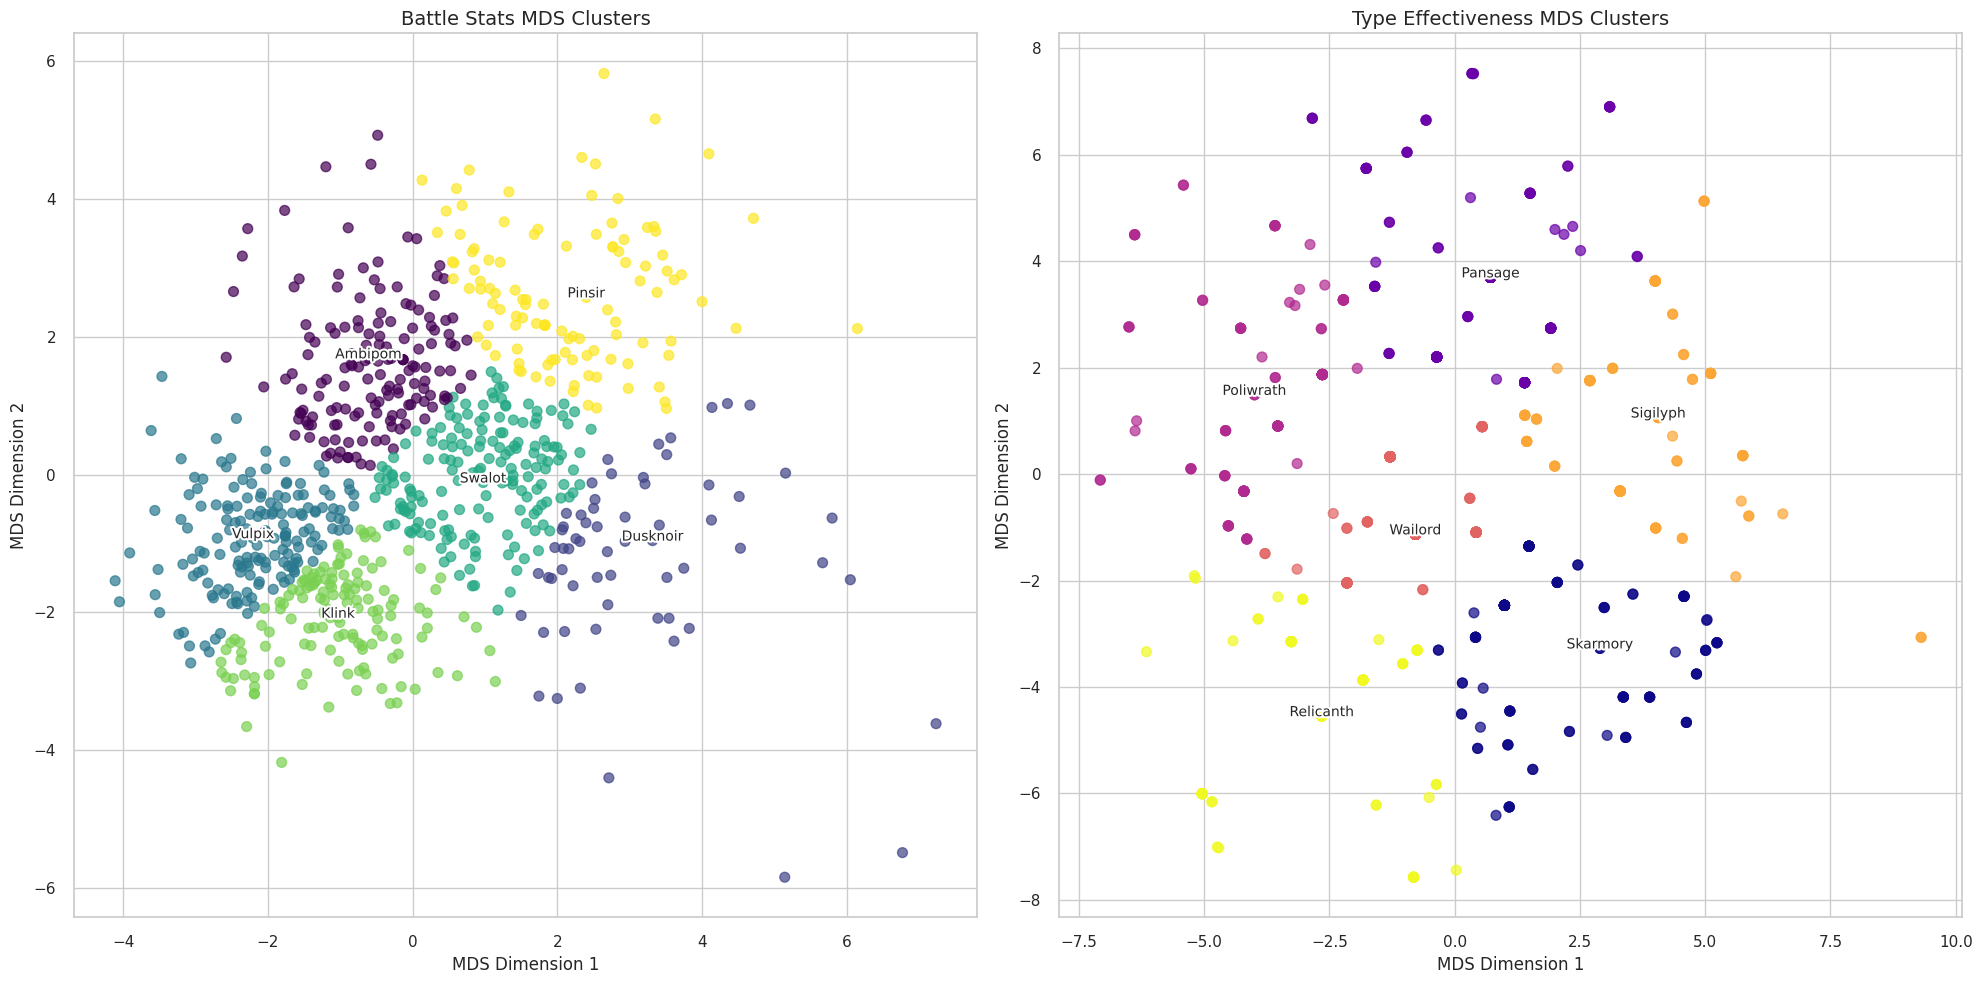

In [290]:
# Create enhanced visualization with cluster labels
if 'type1' in pokemon_clean.columns:
    # Create a figure with subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    
    # Plot battle stats MDS with cluster colors
    scatter1 = axs[0].scatter(
        pokemon_clean['mds_battle_x'], 
        pokemon_clean['mds_battle_y'],
        c=pokemon_clean['cluster_mds_battle_x_mds_battle_y'],
        cmap='viridis',
        alpha=0.7,
        s=50
    )
    axs[0].set_title('Battle Stats MDS Clusters', fontsize=14)
    axs[0].set_xlabel('MDS Dimension 1', fontsize=12)
    axs[0].set_ylabel('MDS Dimension 2', fontsize=12)
    
    # Plot representative Pokémon names
    if 'name' in pokemon_clean.columns:
        for idx in battle_reps:
            x = pokemon_clean.iloc[idx]['mds_battle_x']
            y = pokemon_clean.iloc[idx]['mds_battle_y']
            name = pokemon_clean.iloc[idx]['name']
            text = axs[0].text(x, y, name, fontsize=10, ha='center')
            text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])
    
    # Plot type effectiveness MDS with cluster colors (if available)
    if len(type_cols) > 0:
        scatter2 = axs[1].scatter(
            pokemon_clean['mds_type_euclidean_x'], 
            pokemon_clean['mds_type_euclidean_y'],
            c=pokemon_clean['cluster_mds_type_euclidean_x_mds_type_euclidean_y'],
            cmap='plasma',
            alpha=0.7,
            s=50
        )
        axs[1].set_title('Type Effectiveness MDS Clusters', fontsize=14)
        axs[1].set_xlabel('MDS Dimension 1', fontsize=12)
        axs[1].set_ylabel('MDS Dimension 2', fontsize=12)
        
        # Plot representative Pokémon names
        if 'name' in pokemon_clean.columns:
            for idx in type_reps:
                x = pokemon_clean.iloc[idx]['mds_type_euclidean_x']
                y = pokemon_clean.iloc[idx]['mds_type_euclidean_y']
                name = pokemon_clean.iloc[idx]['name']
                text = axs[1].text(x, y, name, fontsize=10, ha='center')
                text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])
    
    plt.tight_layout()
    plt.show()

## 9. Locally Linear Embedding (LLE)

Locally Linear Embedding (LLE) is a non-linear, unsupervised manifold learning technique. Unlike PCA, which preserves global structure, LLE attempts to preserve local relationships by reconstructing each data point from its neighbors and then preserving these local reconstruction weights in a lower-dimensional space.

LLE is especially useful for "unrolling" curved or non-linear manifolds in the data.

In [291]:
# Import LLE from sklearn
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.neighbors import NearestNeighbors
import time

### 9.1 LLE on Battle Stats

First, we'll apply LLE to the core battle stats. LLE requires the number of neighbors parameter `n_neighbors`, and results can be sensitive to this choice. We'll experiment with different values.

In [292]:
# Check if we have battle stats data scaled
if 'battle_data_scaled' not in locals():
    # Define core battle stats columns again if needed
    battle_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
    
    # Check if we have all the required columns
    missing_cols = [col for col in battle_stats if col not in pokemon_clean.columns]
    if missing_cols:
        print(f"Warning: Missing columns {missing_cols}. Proceeding with available columns.")
        battle_stats = [col for col in battle_stats if col in pokemon_clean.columns]
    
    # Extract battle stats data
    battle_data = pokemon_clean[battle_stats].copy()
    
    # Scale the data
    scaler = StandardScaler()
    battle_data_scaled = scaler.fit_transform(battle_data)

# Get the number of data points
n_samples = battle_data_scaled.shape[0]

# Define a range of n_neighbors values to try
# For LLE, the rule of thumb is that n_neighbors should be greater than the intrinsic dimensionality of the manifold
# We'll try some values in a reasonable range based on the dataset size
neighbors_range = [5, 10, 20, 30, 50]

# Create a dictionary to store the LLE results
lle_results = {}

# Apply LLE with different n_neighbors values
for n_neighbors in neighbors_range:
    if n_neighbors < n_samples:
        print(f"Running LLE with n_neighbors={n_neighbors}...")
        
        # Start timer
        start_time = time.time()
        
        # Apply LLE
        lle = LocallyLinearEmbedding(
            n_components=2,
            n_neighbors=n_neighbors,
            random_state=42,
            method='standard',
            eigen_solver='auto',
            n_jobs=-1
        )
        
        try:
            battle_lle = lle.fit_transform(battle_data_scaled)
            
            # Store the results
            lle_results[n_neighbors] = {
                'embedding': battle_lle,
                'reconstruction_error': lle.reconstruction_error_,
                'time': time.time() - start_time
            }
            
            print(f"  Completed in {lle_results[n_neighbors]['time']:.2f} seconds")
            print(f"  Reconstruction error: {lle.reconstruction_error_:.6f}")
            
            # Add LLE coordinates to dataframe
            pokemon_clean[f'lle_{n_neighbors}_x'] = battle_lle[:, 0]
            pokemon_clean[f'lle_{n_neighbors}_y'] = battle_lle[:, 1]
            
        except Exception as e:
            print(f"  Error with n_neighbors={n_neighbors}: {e}")
            continue

# Print a summary of reconstruction errors
print("\nReconstruction Error Summary:")
for n_neighbors, result in lle_results.items():
    print(f"n_neighbors={n_neighbors}: {result['reconstruction_error']:.6f}")

Running LLE with n_neighbors=5...
  Completed in 0.09 seconds
  Reconstruction error: 0.000000
Running LLE with n_neighbors=10...
  Completed in 0.13 seconds
  Reconstruction error: 0.000000
Running LLE with n_neighbors=20...
  Completed in 0.11 seconds
  Reconstruction error: 0.000004
Running LLE with n_neighbors=30...
  Completed in 0.13 seconds
  Reconstruction error: 0.000010
Running LLE with n_neighbors=50...
  Completed in 0.17 seconds
  Reconstruction error: 0.000017

Reconstruction Error Summary:
n_neighbors=5: 0.000000
n_neighbors=10: 0.000000
n_neighbors=20: 0.000004
n_neighbors=30: 0.000010
n_neighbors=50: 0.000017


### 9.2 Visualizing LLE Results

Now let's visualize the LLE embeddings with different n_neighbors values and compare them.

In [293]:
# Create interactive scatter plots for different n_neighbors values colored by type1
if 'type1' in pokemon_clean.columns and len(lle_results) > 0:
    # Create a subplot for each n_neighbors value
    fig = make_subplots(
        rows=len(lle_results) // 2 + len(lle_results) % 2, 
        cols=2 if len(lle_results) > 1 else 1,
        subplot_titles=[f"LLE with n_neighbors={n}" for n in lle_results.keys()],
        vertical_spacing=0.1
    )
    
    # Add traces for each n_neighbors value
    i = 0
    for n_neighbors in lle_results.keys():
        # Calculate row and column indices
        row = i // 2 + 1
        col = i % 2 + 1
        
        # Get unique types for coloring
        types = pokemon_clean['type1'].unique()
        
        # Create a scatter plot for each type
        for type_name in types:
            type_mask = pokemon_clean['type1'] == type_name
            
            fig.add_trace(
                go.Scatter(
                    x=pokemon_clean.loc[type_mask, f'lle_{n_neighbors}_x'],
                    y=pokemon_clean.loc[type_mask, f'lle_{n_neighbors}_y'],
                    mode='markers',
                    name=type_name,
                    showlegend=(True if i == 0 else False),  # Only show legend for the first subplot
                    hovertext=pokemon_clean.loc[type_mask, 'name'] if 'name' in pokemon_clean.columns else None,
                    marker=dict(opacity=0.7)
                ),
                row=row, col=col
            )
        
        # Update axes labels
        fig.update_xaxes(title_text="LLE Dimension 1", row=row, col=col)
        fig.update_yaxes(title_text="LLE Dimension 2", row=row, col=col)
        
        i += 1
    
    # Update layout
    fig.update_layout(
        height=300 * (len(lle_results) // 2 + len(lle_results) % 2),
        width=1000,
        title_text="LLE of Battle Stats with Different n_neighbors Values",
        template='plotly_white'
    )
    
    fig.show()

In [294]:
# Visualize best LLE embeddings (choose the one with the lowest reconstruction error)
if len(lle_results) > 0:
    # Find the n_neighbors value with the lowest reconstruction error
    best_n_neighbors = min(lle_results.keys(), key=lambda k: lle_results[k]['reconstruction_error'])
    print(f"Best n_neighbors value: {best_n_neighbors} (Reconstruction error: {lle_results[best_n_neighbors]['reconstruction_error']:.6f})")
    
    # Create interactive scatter plot colored by type1
    if 'type1' in pokemon_clean.columns:
        fig = px.scatter(
            pokemon_clean, 
            x=f'lle_{best_n_neighbors}_x', 
            y=f'lle_{best_n_neighbors}_y',
            color='type1',
            hover_name='name' if 'name' in pokemon_clean.columns else None,
            title=f'LLE of Battle Stats (n_neighbors={best_n_neighbors}) by Primary Type',
            labels={
                f'lle_{best_n_neighbors}_x': 'LLE Dimension 1', 
                f'lle_{best_n_neighbors}_y': 'LLE Dimension 2'
            },
            template='plotly_white'
        )
        fig.update_layout(
            legend_title_text='Type',
            height=700,
            width=900
        )
        fig.show()
        
    # Create interactive scatter plot colored by is_legendary
    if 'is_legendary' in pokemon_clean.columns:
        fig = px.scatter(
            pokemon_clean, 
            x=f'lle_{best_n_neighbors}_x', 
            y=f'lle_{best_n_neighbors}_y',
            color='is_legendary',
            hover_name='name' if 'name' in pokemon_clean.columns else None,
            title=f'LLE of Battle Stats (n_neighbors={best_n_neighbors}) by Legendary Status',
            labels={
                f'lle_{best_n_neighbors}_x': 'LLE Dimension 1', 
                f'lle_{best_n_neighbors}_y': 'LLE Dimension 2'
            },
            template='plotly_white'
        )
        fig.update_layout(
            legend_title_text='Legendary Status',
            height=700,
            width=900
        )
        fig.show()
        
    # Create interactive scatter plot colored by generation
    if 'generation' in pokemon_clean.columns:
        fig = px.scatter(
            pokemon_clean, 
            x=f'lle_{best_n_neighbors}_x', 
            y=f'lle_{best_n_neighbors}_y',
            color='generation',
            hover_name='name' if 'name' in pokemon_clean.columns else None,
            title=f'LLE of Battle Stats (n_neighbors={best_n_neighbors}) by Generation',
            labels={
                f'lle_{best_n_neighbors}_x': 'LLE Dimension 1', 
                f'lle_{best_n_neighbors}_y': 'LLE Dimension 2'
            },
            template='plotly_white'
        )
        fig.update_layout(
            legend_title_text='Generation',
            height=700,
            width=900
        )
        fig.show()

Best n_neighbors value: 5 (Reconstruction error: 0.000000)


### 9.3 Comparison: LLE vs PCA vs MDS

Now let's compare the three dimensionality reduction techniques: LLE, PCA, and MDS to see if LLE reveals any interesting non-linear structures that PCA and MDS might have missed.

In [295]:
# Compare PCA, MDS, and LLE side by side
if len(lle_results) > 0:
    # Select best LLE result for comparison
    best_n_neighbors = min(lle_results.keys(), key=lambda k: lle_results[k]['reconstruction_error'])
    
    # Create a combined plot
    if ('battle_pc1' in pokemon_clean.columns and 
        'battle_pc2' in pokemon_clean.columns and 
        'mds_battle_x' in pokemon_clean.columns and
        'mds_battle_y' in pokemon_clean.columns):
        
        # Create a subplots figure
        fig = make_subplots(
            rows=1, cols=3,
            subplot_titles=['PCA', 'MDS', f'LLE (n_neighbors={best_n_neighbors})'],
            horizontal_spacing=0.05
        )
        
        # Get unique types for coloring
        if 'type1' in pokemon_clean.columns:
            types = pokemon_clean['type1'].unique()
            
            # Add traces for each type
            for type_name in types:
                type_mask = pokemon_clean['type1'] == type_name
                
                # Add PCA scatter
                fig.add_trace(
                    go.Scatter(
                        x=pokemon_clean.loc[type_mask, 'battle_pc1'],
                        y=pokemon_clean.loc[type_mask, 'battle_pc2'],
                        mode='markers',
                        name=type_name,
                        marker=dict(opacity=0.7),
                        showlegend=True,
                        hovertext=pokemon_clean.loc[type_mask, 'name'] if 'name' in pokemon_clean.columns else None
                    ),
                    row=1, col=1
                )
                
                # Add MDS scatter
                fig.add_trace(
                    go.Scatter(
                        x=pokemon_clean.loc[type_mask, 'mds_battle_x'],
                        y=pokemon_clean.loc[type_mask, 'mds_battle_y'],
                        mode='markers',
                        name=type_name,
                        marker=dict(opacity=0.7),
                        showlegend=False,
                        hovertext=pokemon_clean.loc[type_mask, 'name'] if 'name' in pokemon_clean.columns else None
                    ),
                    row=1, col=2
                )
                
                # Add LLE scatter
                fig.add_trace(
                    go.Scatter(
                        x=pokemon_clean.loc[type_mask, f'lle_{best_n_neighbors}_x'],
                        y=pokemon_clean.loc[type_mask, f'lle_{best_n_neighbors}_y'],
                        mode='markers',
                        name=type_name,
                        marker=dict(opacity=0.7),
                        showlegend=False,
                        hovertext=pokemon_clean.loc[type_mask, 'name'] if 'name' in pokemon_clean.columns else None
                    ),
                    row=1, col=3
                )
        
        # Update axes labels
        fig.update_xaxes(title_text="PC1", row=1, col=1)
        fig.update_yaxes(title_text="PC2", row=1, col=1)
        
        fig.update_xaxes(title_text="MDS Dimension 1", row=1, col=2)
        fig.update_yaxes(title_text="MDS Dimension 2", row=1, col=2)
        
        fig.update_xaxes(title_text="LLE Dimension 1", row=1, col=3)
        fig.update_yaxes(title_text="LLE Dimension 2", row=1, col=3)
        
        # Update layout
        fig.update_layout(
            height=600,
            width=1500,
            title_text="Comparison of Dimensionality Reduction Techniques on Battle Stats",
            template='plotly_white'
        )
        
        fig.show()

### 9.4 Analysis of LLE Results

Let's analyze what the LLE visualizations reveal about the Pokémon data, particularly focusing on non-linear structures or relationships that might not be visible with linear methods like PCA.

In [296]:
# Cluster analysis of LLE embeddings to find groups of similar Pokémon
if len(lle_results) > 0:
    from sklearn.cluster import KMeans
    
    # Select best LLE result
    best_n_neighbors = min(lle_results.keys(), key=lambda k: lle_results[k]['reconstruction_error'])
    
    # Extract LLE coordinates
    X_lle = pokemon_clean[[f'lle_{best_n_neighbors}_x', f'lle_{best_n_neighbors}_y']].values
    
    # Determine optimal number of clusters using silhouette score
    from sklearn.metrics import silhouette_score
    
    silhouette_scores = []
    K_range = range(2, 11)  # Try between 2 and 10 clusters
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_lle)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_lle, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {k}, the average silhouette score is : {silhouette_avg:.4f}")
    
    # Find optimal number of clusters
    optimal_k = K_range[np.argmax(silhouette_scores)]
    print(f"\nOptimal number of clusters: {optimal_k}")
    
    # Apply KMeans with optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    lle_clusters = kmeans.fit_predict(X_lle)
    
    # Add cluster labels to dataframe
    pokemon_clean['lle_cluster'] = lle_clusters
    
    # Create interactive scatter plot colored by clusters
    fig = px.scatter(
        pokemon_clean, 
        x=f'lle_{best_n_neighbors}_x', 
        y=f'lle_{best_n_neighbors}_y',
        color='lle_cluster',
        hover_name='name' if 'name' in pokemon_clean.columns else None,
        title=f'LLE Clusters ({optimal_k} clusters)',
        labels={
            f'lle_{best_n_neighbors}_x': 'LLE Dimension 1', 
            f'lle_{best_n_neighbors}_y': 'LLE Dimension 2',
            'lle_cluster': 'Cluster'
        },
        template='plotly_white',
        color_discrete_sequence=px.colors.qualitative.Bold
    )
    fig.update_layout(
        height=700,
        width=900
    )
    fig.show()
    
    # Analyze cluster composition
    print("\nCluster Composition Analysis:")
    for i in range(optimal_k):
        cluster_mask = pokemon_clean['lle_cluster'] == i
        cluster_size = sum(cluster_mask)
        
        print(f"\nCluster {i} ({cluster_size} Pokémon):")
        
        # Type distribution
        if 'type1' in pokemon_clean.columns:
            type_counts = pokemon_clean.loc[cluster_mask, 'type1'].value_counts()
            top_types = type_counts.nlargest(3)
            print(f"  Top Types: {', '.join([f'{type_} ({count})' for type_, count in top_types.items()])}")
        
        # Stats average
        if all(stat in pokemon_clean.columns for stat in battle_stats):
            stats_avg = pokemon_clean.loc[cluster_mask, battle_stats].mean()
            print(f"  Avg Stats: {', '.join([f'{stat}: {val:.1f}' for stat, val in stats_avg.items()])}")
        
        # Legendary percentage
        if 'is_legendary' in pokemon_clean.columns:
            legendary_pct = pokemon_clean.loc[cluster_mask, 'is_legendary'].mean() * 100
            print(f"  Legendary: {legendary_pct:.1f}%")
        
        # Representative Pokémon (closest to cluster center)
        if 'name' in pokemon_clean.columns:
            cluster_points = X_lle[cluster_mask]
            cluster_center = kmeans.cluster_centers_[i]
            
            # Find points closest to center
            distances = np.sqrt(((cluster_points - cluster_center)**2).sum(axis=1))
            closest_indices = np.argsort(distances)[:3]
            
            # Get the indices in the original dataframe
            original_indices = np.where(cluster_mask)[0][closest_indices]
            representatives = [pokemon_clean.iloc[idx]['name'] for idx in original_indices]
            
            print(f"  Representatives: {', '.join(representatives)}")

For n_clusters = 2, the average silhouette score is : 0.8740
For n_clusters = 3, the average silhouette score is : 0.8807
For n_clusters = 4, the average silhouette score is : 0.8381
For n_clusters = 5, the average silhouette score is : 0.8133
For n_clusters = 6, the average silhouette score is : 0.7903
For n_clusters = 7, the average silhouette score is : 0.7175
For n_clusters = 8, the average silhouette score is : 0.6299
For n_clusters = 9, the average silhouette score is : 0.6934
For n_clusters = 10, the average silhouette score is : 0.6981

Optimal number of clusters: 3



Cluster Composition Analysis:

Cluster 0 (778 Pokémon):
  Top Types: water (113), normal (99), grass (78)
  Avg Stats: hp: 67.2, attack: 76.4, defense: 72.4, sp_attack: 70.5, sp_defense: 70.1, speed: 65.4, base_total: 422.0
  Legendary: 7.5%
  Representatives: Haunter, Gligar, Phanpy

Cluster 1 (14 Pokémon):
  Top Types: normal (4), dragon (4), psychic (2)
  Avg Stats: hp: 158.4, attack: 117.0, defense: 85.0, sp_attack: 112.5, sp_defense: 96.4, speed: 86.9, base_total: 656.3
  Legendary: 71.4%
  Representatives: Lunala, Solgaleo, Yveltal

Cluster 2 (9 Pokémon):
  Top Types: psychic (2), rock (2), normal (2)
  Avg Stats: hp: 78.1, attack: 142.0, defense: 109.2, sp_attack: 77.3, sp_defense: 102.6, speed: 118.9, base_total: 628.1
  Legendary: 22.2%
  Representatives: Lopunny, Meloetta, Gallade


## 10. Conclusion

In this notebook, we've performed four different analyses on the Pokémon dataset:

1. **PCA Analysis**: Reduced dimensionality of battle stats and type effectiveness profiles to identify the main patterns in Pokémon data.

2. **LDA Classification**: Used Linear Discriminant Analysis to find the optimal feature combination that separates legendary from non-legendary Pokémon.

3. **MDS Analysis**: Visualized similarity between Pokémon based on both battle stats and type effectiveness profiles using multidimensional scaling.

4. **LLE Analysis**: Applied Locally Linear Embedding to discover non-linear patterns in battle stats that might be missed by linear methods like PCA.

These analyses provide complementary perspectives on the structure of the Pokémon dataset. PCA and LDA focus on linear patterns and separations, while MDS preserves distances between data points, and LLE captures local non-linear relationships.

Key findings include:
- The main factors that determine Pokémon battle characteristics
- Statistical patterns that separate legendary from non-legendary Pokémon
- Clusters of Pokémon with similar battle stats and defensive profiles
- Non-linear structures in the dataset revealed by LLE